### Heart attack prediction Datasets
<br>
- 각 칼럼의 의미 정리
<br><br>

1. Age : 나이
2. Sex : 성별
3. cp : 가슴통증종류(*4가지 협심증)
4. trtbps : 안정기혈압
5. chol : 콜레스트롤
6. fbs : 혈당수치
7. restecg : 안정기심전도검사(0:보통,1:ST-T 2:명백한좌심실비대증)
8. thalch : 최대심박수
9. exang : 운동성 협심증
10. oldpeak : 휴식시 ST감소
11. slope :peak경사도
12. Ca : 주요혈관수
13. thal : (보통, 고정결함, 반복결함)
14. output: 예측결과
---

#### * cp의 4가지 협심증 *
##### 1. 부위가 흉골하부위 (substernal area) 인지?
##### 2. 활동이나 정신적 스트레스에 의해 유발되는지? (심근 산소요구량 증가 상황)
##### 3. 휴식하거나 NTG 복용으로 호전되는지?
 - 3가지 다 해당되는 경우 -> 전형적인 협심증 (typical anginal pain)

 - 2가지만 해당되는 경우-> 비전형적 흉통 (atypical anginal pain)
 - 1가지 이하로 해당되는 경우-> 비협심증 흉통 (non-anginal pain)

<br>[출처] anginal pain (협심증)|작성자 이저의학

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
# heart.csv 1 파일 업로드 
from google.colab import files
heart_data_1 = files.upload()

Saving data.csv to data.csv
Saving heart.csv to heart.csv


In [ ]:
# data.csv 파일 업로드
from google.colab import files
heart_data_2 = files.upload()

Saving data.csv to data.csv


In [4]:
# 데이터 프레임으로 데이터 살펴보기
heart1_DF = pd.read_csv('/content/heart.csv')
heart2_DF = pd.read_csv('/content/data.csv')

In [5]:
heart1_DF.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart2_DF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [7]:
heart1df = heart1_DF[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','output']]
heart1df.columns=['나이','성별','흉통유형','안정시 혈압','콜레스테롤','공복 혈당 > 120 mg/dl','휴식기 심전도','최대 심박수','협심증','휴식후st하강','심장마비확률']
heart1df.head()

,나이,성별,흉통유형,안정시 혈압,콜레스테롤,공복 혈당 > 120 mg/dl,휴식기 심전도,최대 심박수,협심증,휴식후st하강,심장마비확률
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1


heart2
- age
- sex
- cp
- trestbps
- chol
- fbs
- restecg
- thalach
- exang
- oldpeak
- num

In [8]:
print(heart2_DF.columns)   # num 컬럼이 없다고 나와서 한번 확인해보니 이상하게 공백...이 있었다

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [12]:
heart2df = heart2_DF[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','num']]
heart2df.columns=['나이','성별','흉통유형','안정시 혈압','콜레스테롤','공복 혈당 > 120 mg/dl','휴식기 심전도','최대 심박수','협심증','휴식후st하강','심장마비확률']
heart2df.head()

,나이,성별,흉통유형,안정시 혈압,콜레스테롤,공복 혈당 > 120 mg/dl,휴식기 심전도,최대 심박수,협심증,휴식후st하강,심장마비확률
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,?,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [13]:
heart2df['나이'].replace("?", np.nan, inplace=True)
heart2df['성별'].replace("?", np.nan, inplace=True)
heart2df['흉통유형'].replace("?", np.nan, inplace=True)
heart2df['안정시 혈압'].replace("?", np.nan, inplace=True)
heart2df['콜레스테롤'].replace("?", np.nan, inplace=True)
heart2df['공복 혈당 > 120 mg/dl'].replace("?", np.nan, inplace=True)
heart2df['휴식기 심전도'].replace("?", np.nan, inplace=True)
heart2df['최대 심박수'].replace("?", np.nan, inplace=True)
heart2df['협심증'].replace("?", np.nan, inplace=True)
heart2df['휴식후st하강'].replace("?", np.nan, inplace=True)
heart2df['심장마비확률'].replace("?", np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [14]:
heart2df.isnull().sum()

나이                    0
성별                    0
흉통유형                  0
안정시 혈압                1
콜레스테롤                23
공복 혈당 > 120 mg/dl     8
휴식기 심전도               1
최대 심박수                1
협심증                   1
휴식후st하강               0
심장마비확률                0
dtype: int64

In [15]:
heart2df.dropna(subset=['안정시 혈압'], axis=0, inplace=True)
heart2df.dropna(subset=['콜레스테롤'], axis=0, inplace=True)
heart2df.dropna(subset=['공복 혈당 > 120 mg/dl'], axis=0, inplace=True)
heart2df.dropna(subset=['휴식기 심전도'], axis=0, inplace=True)
heart2df.dropna(subset=['최대 심박수'], axis=0, inplace=True)
heart2df.dropna(subset=['협심증'], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [16]:
print(heart1df.dtypes)
print(heart2df.dtypes)

나이                     int64
성별                     int64
흉통유형                   int64
안정시 혈압                 int64
콜레스테롤                  int64
공복 혈당 > 120 mg/dl      int64
휴식기 심전도                int64
최대 심박수                 int64
협심증                    int64
휴식후st하강              float64
심장마비확률                 int64
dtype: object
나이                     int64
성별                     int64
흉통유형                   int64
안정시 혈압                object
콜레스테롤                 object
공복 혈당 > 120 mg/dl     object
휴식기 심전도               object
최대 심박수                object
협심증                   object
휴식후st하강              float64
심장마비확률                 int64
dtype: object


In [17]:
heart2df = heart2df.astype({'안정시 혈압':'int64','콜레스테롤':'int64','공복 혈당 > 120 mg/dl':'int64','휴식기 심전도':'int64','최대 심박수':'int64','협심증':'int64'})

In [18]:
heart2df.dtypes

나이                     int64
성별                     int64
흉통유형                   int64
안정시 혈압                 int64
콜레스테롤                  int64
공복 혈당 > 120 mg/dl      int64
휴식기 심전도                int64
최대 심박수                 int64
협심증                    int64
휴식후st하강              float64
심장마비확률                 int64
dtype: object

In [19]:
heartDF = pd.concat([heart1df,heart2df], axis=0, ignore_index=True)
heartDF.columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak', 'output']
heartDF

,age,sex,cp,trtbps,chol,fbs,restecg,thalch,exang,oldpeak,output
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...
559,52,1,4,160,331,0,0,94,1,2.5,1
560,54,0,3,130,294,0,1,100,1,0.0,1
561,56,1,4,155,342,1,0,150,1,3.0,1
562,58,0,2,180,393,0,0,110,1,1.0,1


In [ ]:
# heartDF[heartDF['age'] < 40]

In [ ]:
# # 40 이상 데이터만 추출
# heartDF = heartDF[heartDF['age'] >= 40]
# heartDF

In [22]:
train = heartDF[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak']]
target = heartDF['output']

### 이상치 데이터 제거 후 모델 학습/예측/평가

- 박스플롯을 확인할떄는 범주형 데이터가 아닌 연속형 데이터를 확인하는것

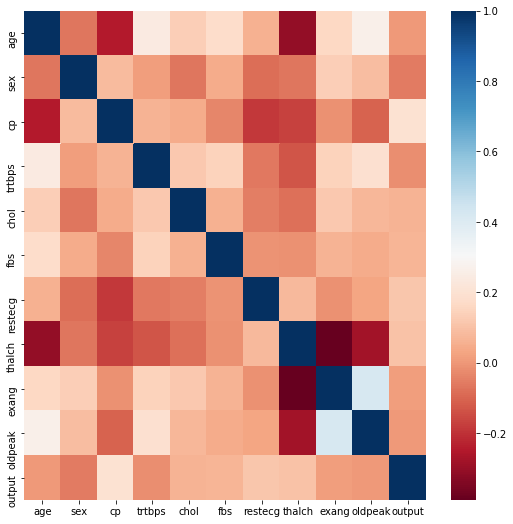

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
corr = heartDF.corr()
sns.heatmap(corr, cmap='RdBu')

In [24]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
  fraud = df[df['output']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [25]:
import numpy as np

def get_outlier0(df=None, column=None, weight=1.5):
  # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
  fraud = df[df['output']==0][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [26]:
outlier_index1 = get_outlier(df=heartDF, column='age')
print('이상치 데이터 인덱스:', outlier_index1)
outlier_index2 = get_outlier(df=heartDF, column='trtbps')
print('이상치 데이터 인덱스:', outlier_index2)
outlier_index3 = get_outlier(df=heartDF, column='chol')
print('이상치 데이터 인덱스:', outlier_index3)
outlier_index4 = get_outlier(df=heartDF, column='thalch')
print('이상치 데이터 인덱스:', outlier_index4)
outlier_index5 = get_outlier(df=heartDF, column='oldpeak')
print('이상치 데이터 인덱스:', outlier_index5)

outlier_index6 = get_outlier0(df=heartDF, column='age')
print('이상치 데이터 인덱스:', outlier_index6)
outlier_index7 = get_outlier0(df=heartDF, column='trtbps')
print('이상치 데이터 인덱스:', outlier_index7)
outlier_index8 = get_outlier0(df=heartDF, column='chol')
print('이상치 데이터 인덱스:', outlier_index8)
outlier_index9 = get_outlier0(df=heartDF, column='thalch')
print('이상치 데이터 인덱스:', outlier_index9)
outlier_index10 = get_outlier0(df=heartDF, column='oldpeak')
print('이상치 데이터 인덱스:', outlier_index10)

outlier_index = list(outlier_index1) + list(outlier_index2) + list(outlier_index3) + list(outlier_index4) + list(outlier_index5) + list(outlier_index6) + list(outlier_index7) + list(outlier_index8) + list(outlier_index9) + list(outlier_index10)
outlier_index = list(set(outlier_index))

이상치 데이터 인덱스: Int64Index([144], dtype='int64')
이상치 데이터 인덱스: Int64Index([8, 101, 110, 518, 539, 562], dtype='int64')
이상치 데이터 인덱스: Int64Index([28, 85, 96, 501, 503, 517, 536, 538, 545, 551, 562], dtype='int64')
이상치 데이터 인덱스: Int64Index([], dtype='int64')
이상치 데이터 인덱스: Int64Index([101, 537, 556], dtype='int64')
이상치 데이터 인덱스: Int64Index([], dtype='int64')
이상치 데이터 인덱스: Int64Index([203, 223, 241, 248, 260, 266, 334, 378, 451, 460], dtype='int64')
이상치 데이터 인덱스: Int64Index([220, 246, 367, 413, 439, 449], dtype='int64')
이상치 데이터 인덱스: Int64Index([272], dtype='int64')
이상치 데이터 인덱스: Int64Index([167, 196, 204, 211, 220, 221, 223, 250, 259, 279, 291, 295], dtype='int64')


In [27]:
# drop은 ()안에 들어온 인덱스 값을 참조해서 앞의 DataFrame에서 해당 행을 삭제
heartDF = heartDF.drop(outlier_index)
heartDF

,age,sex,cp,trtbps,chol,fbs,restecg,thalch,exang,oldpeak,output
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...
558,52,1,4,140,266,0,0,134,1,2.0,1
559,52,1,4,160,331,0,0,94,1,2.5,1
560,54,0,3,130,294,0,1,100,1,0.0,1
561,56,1,4,155,342,1,0,150,1,3.0,1


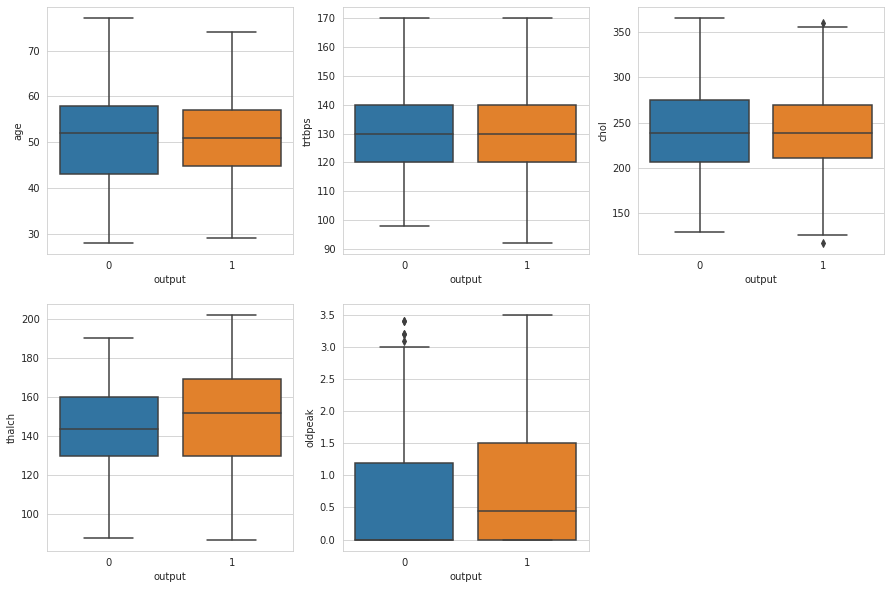

In [28]:
# 박스 플롯으로 시각화해서 살펴보기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

sns.boxplot(x=heartDF['output'], y=heartDF['age'], data=heartDF, ax=ax1)
sns.boxplot(x=heartDF['output'], y=heartDF['trtbps'], data=heartDF, ax=ax2)
sns.boxplot(x=heartDF['output'], y=heartDF['chol'], data=heartDF, ax=ax3)
sns.boxplot(x=heartDF['output'], y=heartDF['thalch'], data=heartDF, ax=ax4)
sns.boxplot(x=heartDF['output'], y=heartDF['oldpeak'], data=heartDF, ax=ax5)

plt.show()

In [29]:
heartDF.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalch,exang,oldpeak,output
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,50.944015,0.714286,1.907336,130.208494,242.090734,0.111969,0.376448,145.552124,0.306950,0.742471,0.471042
std,9.091346,0.452191,1.404299,15.494772,46.757962,0.315633,0.508330,23.770587,0.461674,0.929056,0.499643
min,28.000000,0.000000,0.000000,92.000000,117.000000,0.000000,0.000000,87.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,1.000000,120.000000,209.000000,0.000000,0.000000,130.000000,0.000000,0.000000,0.000000
50%,51.500000,1.000000,2.000000,130.000000,239.000000,0.000000,0.000000,149.500000,0.000000,0.200000,0.000000
75%,57.000000,1.000000,3.000000,140.000000,273.750000,0.000000,1.000000,163.000000,1.000000,1.400000,1.000000
max,77.000000,1.000000,4.000000,170.000000,365.000000,1.000000,2.000000,202.000000,1.000000,3.500000,1.000000


### 이상치 제거한 데이터로 다시 진행


원-핫 인코딩

In [30]:
train = heartDF[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak']]
target = heartDF['output']

In [31]:
# one-hot encoding: 'sex','cp','fbs','restecg','exang'
train_oh = pd.get_dummies(train, columns=['sex','cp','fbs','restecg','exang'])
train_oh.head()

,age,trtbps,chol,thalch,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,63,145,233,150,2.3,0,1,0,0,0,1,0,0,1,1,0,0,1,0
1,37,130,250,187,3.5,0,1,0,0,1,0,0,1,0,0,1,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,0,0,1,0,0,1,0,0,1


### 스케일러

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_oh)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=100)


# random_state=100  전반적으로 0.7을 넘김
# random_state=200 

In [35]:
data_scaled[0]

array([ 1.32737649,  0.95553543, -0.19460902,  0.18729769,  1.67808524,
       -0.63245553,  0.63245553, -0.56694671, -0.35852518, -0.69587405,
        2.63993007, -0.48608317, -2.81620924,  2.81620924,  0.75793673,
       -0.7390999 , -0.10825318,  0.66550502, -0.66550502])

# 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print("오차행렬")
  print(confusion)
  print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율:{2:.4f}".format(accuracy, precision, recall))

In [ ]:
get_clf_eval(y_test, lr_preds)

오차행렬
[[65 16]
 [30 45]]
정확도: 0.7051, 정밀도: 0.7377, 재현율:0.6000


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2'], 'C':[0.01, 0.2, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, target)
print('최적 하이퍼 파라미터:{0}'.format(grid_clf.best_params_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}


In [ ]:
estimator = grid_clf.best_estimator_
estimator

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf_preds = estimator.predict(X_test) 

In [ ]:
get_clf_eval(y_test, clf_preds)

오차행렬
[[65 16]
 [28 47]]
정확도: 0.7179, 정밀도: 0.7460, 재현율:0.6267


# 랜덤 포레스트

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=100)

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print("랜덤 포레스트 정확도: {0:.4f}".format(accuracy))

랜덤 포레스트 정확도: 0.7244


# 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=100)

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)


In [ ]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [ ]:
get_clf_eval(y_test,pred)

오차 행렬
[[55 26]
 [33 42]]
정확도: 0.6218, 정밀도: 0.6176, 재현율: 0.5600


# 의사결정나무 GridSearch CV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 데이터를 로딩하고 학습테이터 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=100)

dtree = DecisionTreeClassifier()

### parameter 들을 dicitionary 형태로 설정
parameters = {'max_depth':[2,3,4,5,7,10,12], 'min_samples_split':[2,3,7,10,12,15]}

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

grid_dtree.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_dtree.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_dtree.best_params_)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
# GridSearchCV를 적용한  Decision Tree

dt_pred = grid_dtree.best_estimator_.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)


print('오차 행렬')
print(confusion)
print('의사결정나무 정확도: {0:.4f}, 의사결정나무 정밀도: {1:.4f}, 의사결정나무 재현율: {2:.4f},\
 F1: {3:.4f}, AUC:{4:.4f}'.format(dt_accuracy, dt_precision, dt_recall, f1, roc_auc))

오차 행렬
[[56 36]
 [30 48]]
의사결정나무 정확도: 0.6474, 의사결정나무 정밀도: 0.6515, 의사결정나무 재현율: 0.5733, F1: 0.7135, AUC:0.7171


# GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=100)

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)


print('오차 행렬')
print(confusion)
print('GBM 정확도: {0:.4f}, GBM 정밀도: {1:.4f}, GBM 재현율: {2:.4f},\
F1: {3:.4f}, AUC:{4:.4f}'.format(gb_accuracy, gb_precision, gb_recall, f1, roc_auc))

오차 행렬
[[56 36]
 [30 48]]
GBM 정확도: 0.7372, GBM 정밀도: 0.7500, GBM 재현율: 0.6800,F1: 0.7135, AUC:0.7171


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[ 100, 300, 500, 700, 1000 ],   # 디폴트는 100
    'learning_rate' : [ 0.02, 0.05, 0.07, 0.1 ]   # 0~1 / 디폴트는 0.1
}
grid_cv = GridSearchCV(gb_clf , param_grid=params)# , cv=2 ,verbose=1
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


# param_grid 인자에 parameters(하이퍼파라미터 정보가 담긴 딕셔너리) 넣어줌으로써 그리드 서치 정보를 준다.
# CV: cross validation 교차 검증

최적 하이퍼 파라미터:
 {'learning_rate': 0.07, 'n_estimators': 1000}
최고 예측 정확도: 0.6685


In [ ]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
'split0_test_score', 'split1_test_score']]

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)


print('오차 행렬')
print(confusion)
print('GBM 정확도: {0:.4f}, GBM 정밀도: {1:.4f}, GBM 재현율: {2:.4f},\
 F1: {3:.4f}, AUC:{4:.4f}'.format(gb_accuracy, gb_precision, gb_recall, f1, roc_auc))

오차 행렬
[[56 36]
 [30 48]]
GBM 정확도: 0.6795, GBM 정밀도: 0.6866, GBM 재현율: 0.6133, F1: 0.7135, AUC:0.7171


# LGBM

In [ ]:
import lightgbm

print(lightgbm.__version__)

2.2.3


In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=100)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds)

오차 행렬
[[62 19]
 [22 53]]
정확도: 0.7372, 정밀도: 0.7361, 재현율: 0.7067,    F1: 0.7211, AUC:0.7360


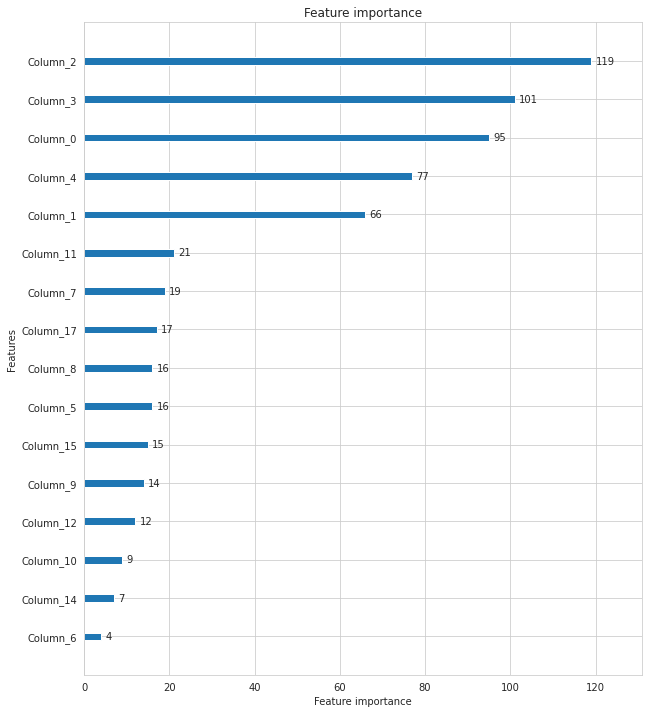

In [ ]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# XGBoost

In [ ]:
import xgboost

print(xgboost.__version__)

0.90


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=100)

dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

# 추가한 예측 코드 문제가 생기면 이 부분일것

params = { 'max_depth':6,
           'eta': 0.3,
           'objective':'reg:squarederror',
           'eval_metric':'logloss',
        }
num_rounds = 400

wlist = [(dtrain,'train'),(dtest,'eval') ]
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist )
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

In [ ]:
get_clf_eval(y_test , preds)

오차 행렬
[[54 27]
 [29 46]]
정확도: 0.6410, 정밀도: 0.6301, 재현율: 0.6133,    F1: 0.6216, AUC:0.6400


### XGBoost GridSearch CV

In [ ]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':100
        }
num_rounds = 400

In [ ]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist )

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.014 0.347 0.099 0.871 0.003 0.446 0.028 0.523 0.856 0.929]
예측값 10개만 표시: [0, 0, 0, 1, 0, 0, 0, 1, 1, 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test , preds)

오차 행렬
[[63 18]
 [22 53]]
정확도: 0.7436, 정밀도: 0.7465, 재현율: 0.7067,    F1: 0.7260, AUC:0.7422


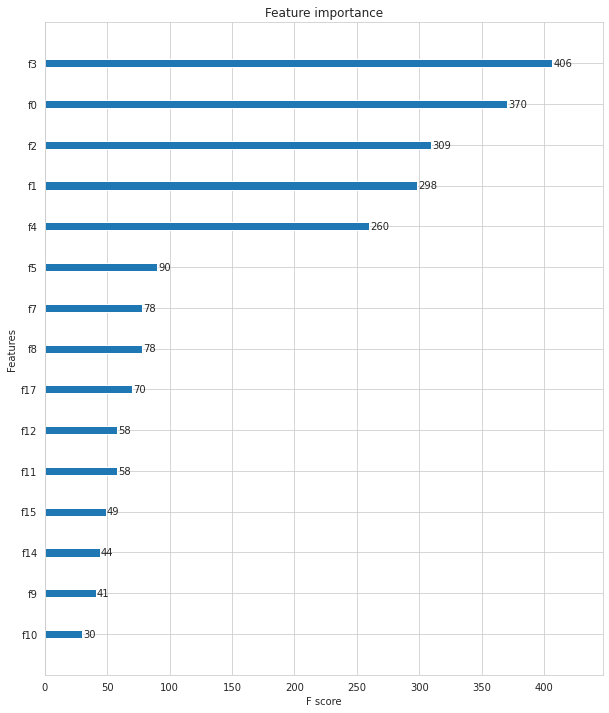

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=100)

# 로지스틱
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 랜덤 포레스트
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# 의사결정나무
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# GBM
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)

# LGBM
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)
# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
lgbm_preds = lgbm_wrapper.predict(X_test)


dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)


# XGBoost
params = { 'max_depth':6,
           'eta': 0.3,
           'objective':'reg:squarederror',
           'eval_metric':'logloss',
        }
num_rounds = 400

wlist = [(dtrain,'train'),(dtest,'eval') ]
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist )
pred_probs = xgb_model.predict(dtest)

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
xgboost_preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]

In [ ]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
model_pred = [lr_preds, rf_pred, dt_pred, gb_pred, lgbm_preds, xgboost_preds]

for preds in model_pred:
  get_clf_eval(y_test, preds)


# 각 모델별 평가지표 (막대그래프)

### 파라미터 조정전

In [ ]:
# 각 모델별 평가지표 막대 그래프


Logistic_before = [0.7059, 0.6795, 0.6795]
RandomForest_before = [0.7294, 0.7051, 0.7051]
DecisionTree_before = [0.6000, 0.5625, 0.5769]
GBM_before = [0.7000, 0.6667, 0.6923]
LightGBM_before = [0.7176, 0.6786, 0.7308]
XGBoost_before = [0.6410, 0.6301, 0.6133]


after_show = pd.DataFrame([Logistic_before, RandomForest_before, DecisionTree_before, GBM_before, LightGBM_before, XGBoost_before], columns = ['accuracy', 'precision', 'recall'], index = ["Logistic", "RandomForest", "DecisionTree", "GBM", "LightGBM", "XGBoost"])
after_show

,accuracy,precision,recall
Logistic,0.7059,0.6795,0.6795
RandomForest,0.7294,0.7051,0.7051
DecisionTree,0.6000,0.5625,0.5769
GBM,0.7000,0.6667,0.6923
LightGBM,0.7176,0.6786,0.7308
XGBoost,0.6410,0.6301,0.6133


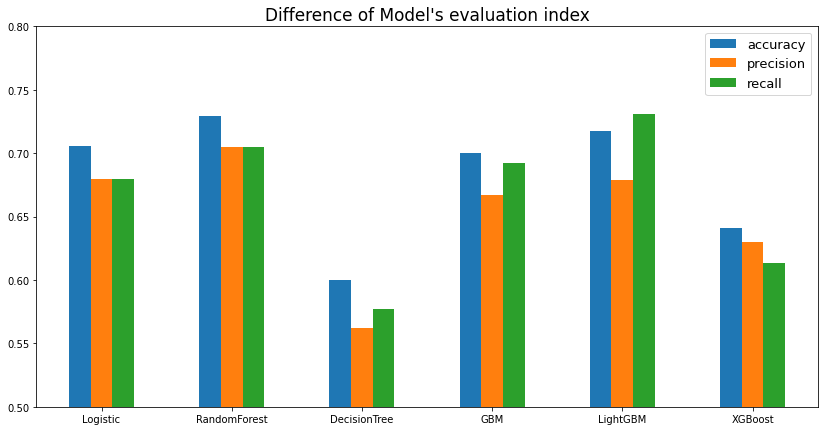

In [ ]:
import matplotlib.pyplot as plt

after_show.plot(kind="bar", figsize=(14, 7))
plt.rc('font', size=13)
plt.rc('lines', lw = 3)
plt.title("Difference of Model's evaluation index", fontsize = 17)

plt.legend(loc = "best")   # 제일 적합하다 생각하는 위치에 위치해줌
plt.xticks(rotation=0)
plt.yticks([0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8])     # y축의 간격을 지정
plt.ylim(0.5, 0.8)    # 최소범위에서 최대범위 지정

plt.show()

### 파라미터 조정 후

In [ ]:
# GridSearch CV 적용 각 모델별 평가지표 막대 그래프

Logistic_after = [0.7372, 0.7397, 0.7105]
RandomForest_after = [0.7244, 0.7260, 0.6974]
DecisionTree_after = [0.6765, 0.7037, 0.6477]
GBM_after = [0.7118, 0.7407, 0.6818]
LightGBM_after = [0.7372, 0.7273, 0.7368]
XGBoost_after = [0.7500, 0.7403, 0.7500]




after_show_cv = pd.DataFrame([Logistic_after, RandomForest_after, DecisionTree_after, GBM_after, LightGBM_after, XGBoost_after], columns = ['accuracy', 'precision', 'recall'], index = ["Logistic", "RandomForest", "DecisionTree", "GBM", "LightGBM", "XGBoost"])
after_show_cv

,accuracy,precision,recall
Logistic,0.7372,0.7397,0.7105
RandomForest,0.7244,0.7260,0.6974
DecisionTree,0.6765,0.7037,0.6477
GBM,0.7118,0.7407,0.6818
LightGBM,0.7372,0.7273,0.7368
XGBoost,0.7500,0.7403,0.7500


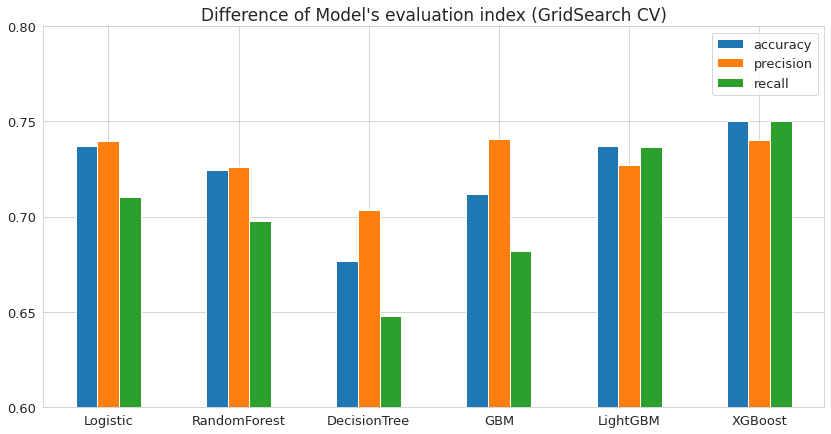

In [ ]:
import matplotlib.pyplot as plt

after_show_cv.plot(kind="bar", figsize=(14, 7))
plt.rc('font', size=13)
plt.rc('lines', lw = 3)
plt.title("Difference of Model's evaluation index (GridSearch CV)", fontsize = 17)

plt.legend(loc = "best")   # 제일 적합하다 생각하는 위치에 위치해줌
plt.xticks(rotation=0)
plt.yticks([0.6, 0.65, 0.7, 0.75, 0.8])   # y축의 간격을 지정
plt.ylim(0.6, 0.8)    # 최소범위에서 최대범위 지정

plt.show()